# Klasifikasi
Dalam klasifikasi kita akan gunakan 3 algoritma:
1. Naive Bayes
2. Decision Tree
3. KNN

In [1]:
import pandas as pd

In [3]:
df = pd.DataFrame([[170,55,'L'],[168,70,'L'],[175,68,'L'],[164,60,'L'],
                    [155,44,'P'],[165,50,'P'],[150,45,'P'],[152,60,'P']])
df.columns = ['Tinggi', 'Berat', 'JK']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tinggi  8 non-null      int64 
 1   Berat   8 non-null      int64 
 2   JK      8 non-null      object
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [6]:
df

,Tinggi,Berat,JK
0,170,55,L
1,168,70,L
2,175,68,L
3,164,60,L
4,155,44,P
5,165,50,P
6,150,45,P
7,152,60,P


In [7]:
X = df[['Tinggi', 'Berat']]
y = df['JK']

In [12]:
# Algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [15]:
d1 = [[163, 56], [155, 43]]
knn.predict(d1)

array(['L', 'P'], dtype=object)

In [16]:
# Visualisasi
import matplotlib.pyplot as plt

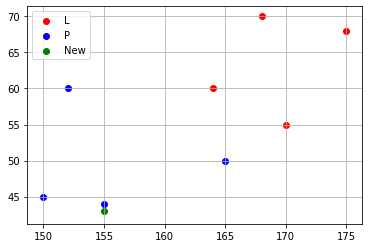

In [22]:
plt.scatter(df['Tinggi'][:4], df['Berat'][:4], color='red', label='L')
plt.scatter(df['Tinggi'][4:], df['Berat'][4:], color='blue', label='P')
plt.scatter(155, 43, color='green', label='New')
plt.grid()
plt.legend()
plt.show()

In [23]:
# Algoritma Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [25]:
nb = GaussianNB()
nb.fit(X, y)

GaussianNB()

In [26]:
d1 = [[163, 56], [155, 43]]
nb.predict(d1)

array(['P', 'P'], dtype='<U1')

## Case: Masa studi mahasiswa 

In [27]:
df_mhs = pd.read_excel('students.xlsx')

In [29]:
df_mhs.head()

,ANGKATAN,JK,IPK1,IPK2,IPK3,IPK4,MSTUDI,STATUS
0,2013,L,3.500000,3.833333,4.000000,3.500000,37.848826,TEPAT
1,2013,L,3.500000,3.750000,3.333333,3.250000,43.762706,TEPAT
2,2013,L,3.166667,3.083333,3.333333,3.250000,37.848826,TEPAT
3,2013,P,3.500000,3.250000,3.500000,3.416667,40.772911,TEPAT
4,2013,L,3.250000,3.166667,3.250000,3.166667,43.762706,TEPAT


In [30]:
df_mhs.shape

(3667, 8)

In [31]:
df_mhs['STATUS'].value_counts()

TDK TEPAT    1956
TEPAT        1711
Name: STATUS, dtype: int64

In [32]:
import numpy as np

In [33]:
df_mhs['STS'] = np.where(df_mhs['MSTUDI']>48, 0, 1)

In [36]:
df_mhs.tail(10)

,ANGKATAN,JK,IPK1,IPK2,IPK3,IPK4,MSTUDI,STATUS,STS
3657,2005,L,3.416667,3.538462,3.083333,0.0,55.426189,TDK TEPAT,0
3658,2005,L,3.166667,3.384615,3.333333,0.0,43.762706,TEPAT,1
3659,2005,L,3.416667,3.428571,3.000000,0.0,46.785355,TEPAT,1
3660,2005,P,3.583333,3.642857,3.333333,0.0,37.750262,TEPAT,1
3661,2005,L,2.750000,2.714286,2.230769,0.0,58.777388,TDK TEPAT,0
3662,2005,P,3.666667,3.357143,3.384615,0.0,43.762706,TEPAT,1
3663,2005,P,3.083333,3.428571,2.923077,0.0,49.380891,TDK TEPAT,0
3664,2005,L,2.333333,2.500000,1.454545,0.0,91.763691,TDK TEPAT,0
3665,2005,L,2.500000,2.642857,2.153846,0.0,67.746771,TDK TEPAT,0
3666,2005,L,3.166667,3.214286,3.083333,0.0,49.380891,TDK TEPAT,0


In [37]:
df_mhs.corr().style.background_gradient().set_precision(2)

,ANGKATAN,IPK1,IPK2,IPK3,IPK4,MSTUDI,STS
ANGKATAN,1.00,0.32,0.23,0.37,0.51,-0.29,0.19
IPK1,0.32,1.00,0.61,0.59,0.39,-0.35,0.30
IPK2,0.23,0.61,1.00,0.66,0.38,-0.40,0.32
IPK3,0.37,0.59,0.66,1.00,0.57,-0.46,0.36
IPK4,0.51,0.39,0.38,0.57,1.00,-0.34,0.24
MSTUDI,-0.29,-0.35,-0.40,-0.46,-0.34,1.00,-0.65
STS,0.19,0.30,0.32,0.36,0.24,-0.65,1.00


In [38]:
features = ['IPK1', 'IPK2', 'IPK3', 'IPK4']
X = df_mhs[features]
y = df_mhs['STATUS']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)

(2566, 4)
(1101, 4)


### 1. Naive Bayes

In [44]:
nb_mhs = GaussianNB()
nb_mhs.fit(X_train, y_train)

GaussianNB()

In [45]:
nb_mhs.score(X_test, y_test)

0.6221616712079927

In [47]:
d2 = [[2.74, 3.1, 3.02, 2.65], [3.6, 3.2, 2.84, 3.32]]
nb_mhs.predict(d2)

array(['TDK TEPAT', 'TEPAT'], dtype='<U9')

### 2. Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt_mhs = DecisionTreeClassifier()
dt_mhs.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
dt_mhs.score(X_test, y_test)

0.5567665758401453

In [51]:
dt_mhs.predict(d2)

array(['TDK TEPAT', 'TDK TEPAT'], dtype=object)

### 3. KNN

In [69]:
knn_mhs = KNeighborsClassifier(n_neighbors = 27)
knn_mhs.fit(X_train, y_train)
knn_mhs.score(X_test, y_test)

0.6630336058128974

In [70]:
knn_mhs.predict(d2)

array(['TDK TEPAT', 'TEPAT'], dtype=object)

## Case: Bukalapak review text

In [71]:
df_rev = pd.read_csv('review.csv')

In [76]:
df_rev.head(10)

,ID,Ulasan,Kelas
0,1,belanja murah & mudah say,Positif
1,2,belanja produk digital disini aja gaesss pulsa...,Positif
2,3,Sering belanja di bukalapak. Nyaman murah terp...,Positif
3,4,ecommerce yang mudah utk belanja,Positif
4,5,Sangat membantu hidup saya.. mudah2n bukalapa...,Positif
5,6,SEMAKIN BANYAK TEROBOSAN TEROBOSAN NYA BUKALAP...,Positif
6,7,85 % saya menggunakan aplikasi ini saat berbel...,Positif
7,8,Suka bangt Smoga lancar smuanya,Positif
8,9,Hendaknya diberi tahu jg persyaratan dan cara ...,Positif
9,10,Aplikasinya keren.paling responsive dibanding ...,Positif


In [77]:
df_rev['Kelas'].value_counts()

Positif    152
Negatif    151
Name: Kelas, dtype: int64

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import re
import random

### Cleaning text

In [81]:
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z #+_]')
sastrawi = StopWordRemoverFactory()
stopword = sastrawi.get_stop_words()
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [82]:
def clean_text(text):
    text = text.lower()
    text = clean_spcl.sub(' ', text)
    text = clean_symbol.sub('', text)
    text = stemmer.stem(text)
    text = ' '.join(word for word in text.split() if word not in stopword)
    
    return text

In [83]:
df_rev['Clean'] = df_rev['Ulasan'].apply(clean_text)

In [85]:
df_rev.head()

,ID,Ulasan,Kelas,Clean
0,1,belanja murah & mudah say,Positif,belanja murah mudah say
1,2,belanja produk digital disini aja gaesss pulsa...,Positif,belanja produk digital sini aja gaesss pulsa t...
2,3,Sering belanja di bukalapak. Nyaman murah terp...,Positif,sering belanja bukalapak nyaman murah percaya ...
3,4,ecommerce yang mudah utk belanja,Positif,ecommerce mudah utk belanja
4,5,Sangat membantu hidup saya.. mudah2n bukalapa...,Positif,sangat bantu hidup mudah2n bukalapak panjang u...


In [86]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df=0)
tf_count = tfidf.fit_transform(df_rev['Clean'])

In [89]:
tf_count

<303x11283 sparse matrix of type '<class 'numpy.float64'>'
	with 15410 stored elements in Compressed Sparse Row format>

In [90]:
X_train, X_test, y_train, y_test = train_test_split(tf_count, df_rev['Kelas'], test_size=0.3, random_state=42)

In [91]:
print(X_train.shape)
print(X_test.shape)

(212, 11283)
(91, 11283)


### 1. Naive Bayes

In [93]:
nb_rev = GaussianNB()
nb_rev.fit(X_train.toarray(), y_train)
nb_rev.score(X_test.toarray(), y_test)

0.8351648351648352

In [118]:
rev1 = ['ga puas dengan layanan di BL']
test = tfidf.transform(rev1)
nb_rev.predict(test.toarray())

array(['Positif'], dtype='<U7')

### 2. Decision Tree

In [97]:
dt_rev = DecisionTreeClassifier()
dt_rev.fit(X_train.toarray(), y_train)
dt_rev.score(X_test.toarray(), y_test)

0.7912087912087912

In [119]:
test = tfidf.transform(rev1)
dt_rev.predict(test.toarray())

array(['Negatif'], dtype=object)

### 3. KNN

In [107]:
knn_rev = KNeighborsClassifier(n_neighbors = 13)
knn_rev.fit(X_train.toarray(), y_train)
knn_rev.score(X_test.toarray(), y_test)

0.8241758241758241

In [120]:
test = tfidf.transform(rev1)
knn_rev.predict(test.toarray())

array(['Positif'], dtype=object)